In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('MS_Dhoni_ODI_record.xlsx')

In [3]:
df['score'] = df['score'].apply(str)

In [4]:
df['opposition'] = df['opposition'].apply(lambda x: x[2:])

In [5]:
df['Year'] = df['date'].dt.year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        350 non-null    object        
 1   runs_scored  350 non-null    object        
 2   balls_faced  350 non-null    object        
 3   strike_rate  350 non-null    object        
 4   fours        350 non-null    object        
 5   sixes        350 non-null    object        
 6   opposition   350 non-null    object        
 7   ground       350 non-null    object        
 8   date         350 non-null    datetime64[ns]
 9   odi_number   350 non-null    object        
 10  Year         350 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 30.2+ KB


In [7]:
df['score'] = df['score'].apply(str)

In [8]:
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)

In [9]:
df.drop(columns='odi_number', inplace=True)

In [10]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,Year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [11]:
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB'))]

In [12]:
df_new = df_new.loc[0:,'runs_scored':]

In [13]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        350 non-null    object        
 1   runs_scored  350 non-null    object        
 2   balls_faced  350 non-null    object        
 3   strike_rate  350 non-null    object        
 4   fours        350 non-null    object        
 5   sixes        350 non-null    object        
 6   opposition   350 non-null    object        
 7   ground       350 non-null    object        
 8   date         350 non-null    datetime64[ns]
 9   Year         350 non-null    int64         
 10  not_out      350 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 28.8+ KB


In [15]:
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y')
print('First match:', first_match_date)

First match: December 23, 2004


In [16]:
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y')
print('Last match:', last_match_date)

Last match: July 09, 2019


In [17]:
number_of_matches = df.shape[0] # number of mathces played in career
print('nNumber of matches played:', number_of_matches)

nNumber of matches played: 350


In [18]:
number_of_ins = df_new.shape[0] # number of mathces played in career
print('nNumber of innings played:', number_of_ins)

nNumber of innings played: 297


In [19]:
not_outs = df_new['not_out'].sum() # number of not outs in career
print('nNot outs:', not_outs)

nNot outs: 84


In [20]:
runs_scored = df_new['runs_scored'].sum()
print('runs scored in career:',runs_scored)

runs scored in career: 10773


In [21]:
balls_faced = df_new['balls_faced'].sum()
print('number of balls faced in career:',balls_faced)

number of balls faced in career: 12303


In [22]:
career_sr = (runs_scored / balls_faced)*100 # career strike rate
print('nCareer strike rate: {0:.2f}'.format(career_sr))

nCareer strike rate: 87.56


In [106]:
career_avg = (runs_scored / (number_of_ins - not_outs)) # career average


In [107]:
print('nCareer average: {:.2f}'.format(career_avg))

nCareer average: 50.58


In [23]:
highest_score = df_new.loc[(df_new['runs_scored'] == df_new['runs_scored'].max(),'runs_scored')].values[0]

In [24]:
highest_score

183

In [25]:
highest_score_date = df_new.loc[df_new['runs_scored'] == df_new['runs_scored'].max(),'date'].values[0]

In [26]:
highest_score_date

numpy.datetime64('2005-10-31T00:00:00.000000000')

In [27]:
hundreds = df_new[df_new['runs_scored']>=100].count().values[0]

In [28]:
hundreds

10

In [29]:
fifties = df_new[(df_new['runs_scored']>=50) & (df_new['runs_scored']<100)].count().values[0]

In [30]:
fifties

73

In [31]:
fours = df_new['fours'].sum()

In [32]:
fours

826

In [33]:
sixes = df_new['sixes'].sum()

In [34]:
sixes

229





# DATA VISUALISATION

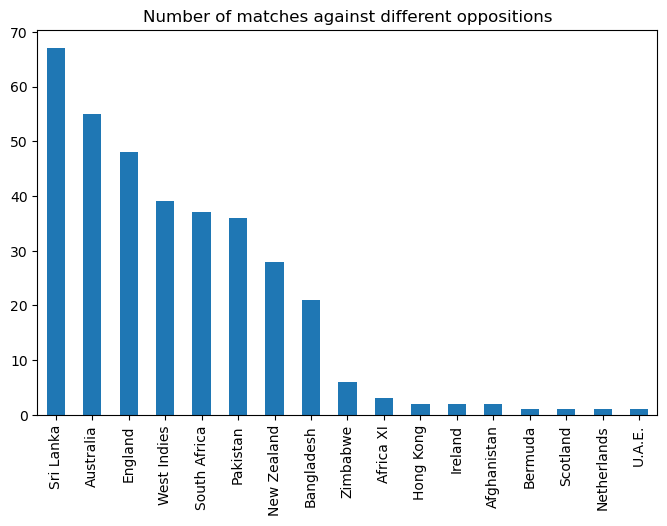

In [35]:
df['opposition'].value_counts().plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5));

In [53]:
runs_scored_by_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())

<Axes: title={'center': 'Runs scored against different oppositions'}, xlabel='opposition'>

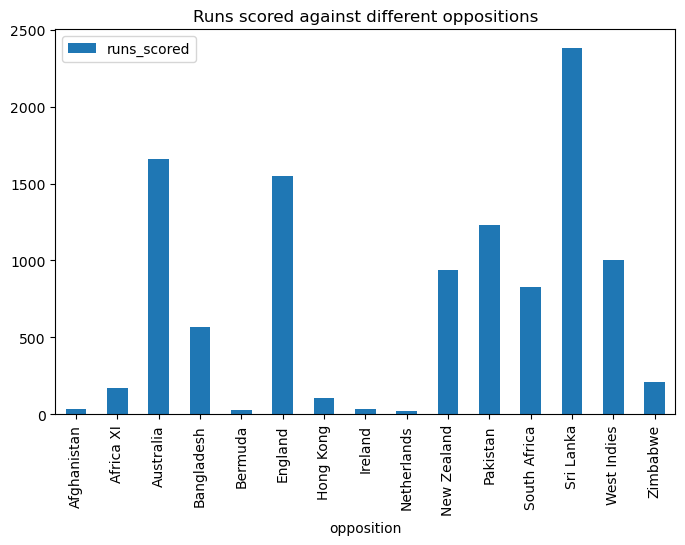

In [59]:
runs_scored_by_opposition.plot(kind='bar', title='Runs scored against different oppositions', figsize=(8, 5))


In [70]:
batting_avg_by_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].mean())

In [79]:
batting_avg_by_opposition = round(batting_avg_by_opposition,2)

<Axes: title={'center': 'Batting Avg against different oppositions'}, xlabel='opposition'>

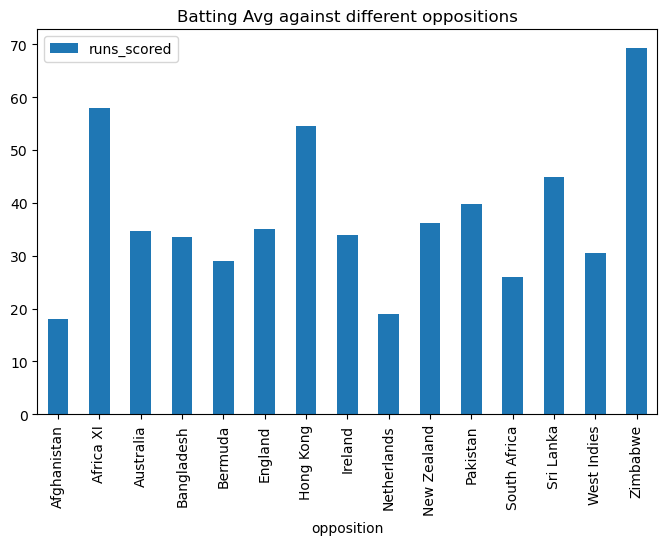

In [82]:
batting_avg_by_opposition.plot(kind='bar', title='Batting Avg against different oppositions', figsize=(8, 5))

In [94]:
innings_by_opposition = pd.DataFrame(df_new.groupby('opposition')['date'].count())
not_outs_by_opposition = pd.DataFrame(df_new.groupby('opposition')['not_out'].sum())
temp = runs_scored_by_opposition.merge(innings_by_opposition, left_index=True, right_index=True)
average_by_opposition = temp.merge(not_outs_by_opposition, left_index=True, right_index=True)
average_by_opposition.rename(columns = {'date': 'innings'}, inplace=True)
average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['not_out']
average_by_opposition['average'] = average_by_opposition['runs_scored'] / average_by_opposition['eff_num_of_inns']
average_by_opposition.replace(np.inf, np.nan, inplace=True)
major_nations = ['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']

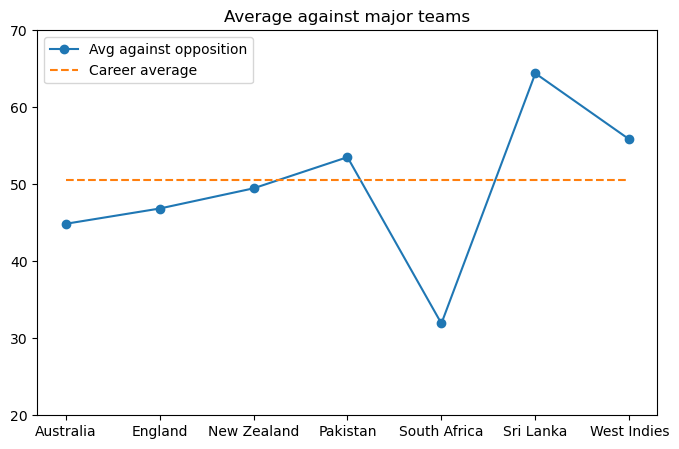

In [109]:
plt.figure(figsize = (8, 5))
plt.plot(average_by_opposition.loc[major_nations, 'average'].values, marker='o')
plt.plot([career_avg]*len(major_nations), '--')
plt.title('Average against major teams')
plt.xticks(range(0, 7), major_nations)
plt.ylim(20, 70)
plt.legend(['Avg against opposition', 'Career average']);


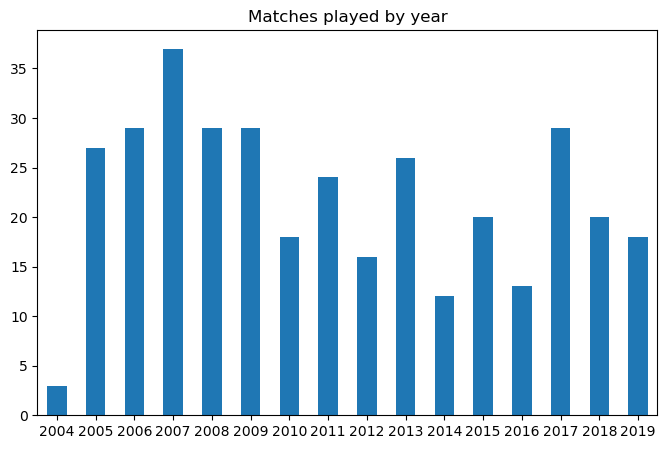

In [117]:
df['Year'].value_counts().sort_index().plot(kind='bar', title='Matches played by year', figsize=(8, 5))
plt.xticks(rotation=0);


In [119]:
df_new.groupby('Year')['runs_scored'].sum().plot(kind='line', title='Runs scored by year', figsize=(8,5))
years = df['Year'].unique().tolist()

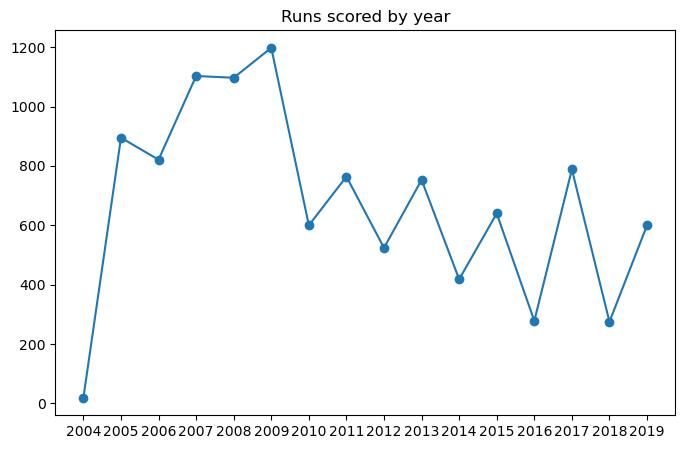

In [124]:
df_new.groupby('Year')['runs_scored'].sum().plot(kind='line', marker='o', title='Runs scored by year', figsize=(8, 5))
years = df['Year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None);

In [125]:
df_new.reset_index(drop=True, inplace=True)
career_average = pd.DataFrame()
career_average['runs_scored_in_career'] = df_new['runs_scored'].cumsum()
career_average['innings'] = df_new.index.tolist()
career_average['innings'] = career_average['innings'].apply(lambda x: x+1)
career_average['not_outs_in_career'] = df_new['not_out'].cumsum()
career_average['eff_num_of_inns'] = career_average['innings'] - career_average['not_outs_in_career']
career_average['average'] = career_average['runs_scored_in_career'] / career_average['eff_num_of_inns']

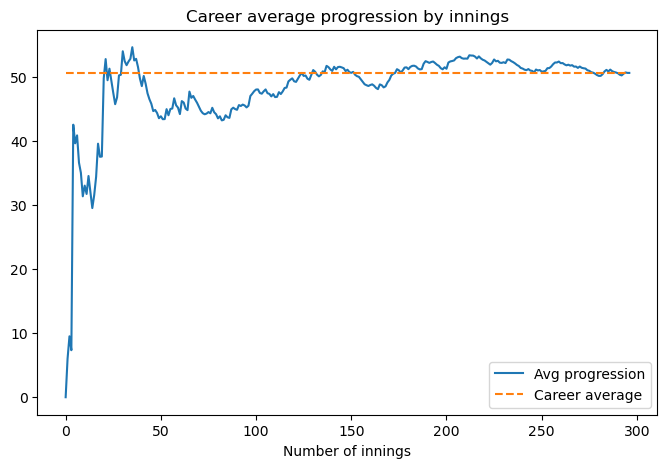

In [126]:
plt.figure(figsize = (8, 5))
plt.plot(career_average['average'])
plt.plot([career_avg]*career_average.shape[0], '--')
plt.title('Career average progression by innings')
plt.xlabel('Number of innings')
plt.legend(['Avg progression', 'Career average']);